In [ ]:
from eunjeon import Mecab # 은전한닢 프로젝트 한국어 형태소 분석기
mecab = Mecab(dicpath='C:/mecab/mecab-ko-dic')  
mecab.pos("품사 태깅을 지원합니다") 

[('품사', 'NNG'),
 ('태', 'NNG'),
 ('깅을', 'UNKNOWN'),
 ('지원', 'NNG'),
 ('합니다', 'XSV+EC')]

In [ ]:
mecab.morphs("형태소 분리를 지원합니다") 

['형태소', '분리', '를', '지원', '합니다']

In [ ]:
mecab.nouns("명사에 해당하는 형태소만 추출합니다")

['명사', '해당', '형태소', '추출']

In [ ]:
# https://konlpy-ko.readthedocs.io/ko/v0.4.3/ 
# 한국어 정보처리
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [54]:
from konlpy.tag import Okt
from collections import Counter
# Okt 객체 생성
okt = Okt()
text = '안녕하세욬ㅋㅋㅋ 반가워요 샤릉해'
print(okt.normalize(text))
text = '안녕하세요. 오래간만이네요~~. 어제 재미있었어요.' 
print(okt.pos(text)) # 품사
text = "장중 큰 변동 폭을 보이던 코스피가 사흘 만에 소폭 반등했다." 
print(okt.nouns(text)) # 명사 추출


안녕하세요ㅋㅋㅋ 반가워요 사랑해
[('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('오래간만', 'Adverb'), ('이네요', 'Verb'), ('~~.', 'Punctuation'), ('어제', 'Noun'), ('재미있었어요', 'Adjective'), ('.', 'Punctuation')]
['장', '변동', '폭', '보', '코스피', '사흘', '폭', '반등']


In [ ]:
# 불용어 제거 명사만 추출 
from konlpy.tag import Mecab
mecab = Mecab(dicpath='C:/mecab/mecab-ko-dic') 

stopwords = ['의','이','있','하','들','그','되','수','보','않','없','나','사람','아','등','같','오','있','한'] #불용어사전

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
[i for i in mecab.nouns(ex_text) if i not in stopwords]

['이번', '개봉', '영화', '배우', '연기력', '목소리']

In [ ]:
# 불용어 제거
import re
from konlpy.tag import Okt
tokenizer = Okt()
def text_preprocessing(text,tokenizer):
    
    stopwords = ['을', '를', '이', '가', '은', '는']
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    token = tokenizer.morphs(txt)
    token = [t for t in token if t not in stopwords]
        
    return token

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre= text_preprocessing(ex_text,tokenizer)
print(example_pre)

['이번', '에', '새롭게', '개봉', '한', '영화', '의', '배우', '들', '모두', '훌륭한', '연기력', '과', '아름다운', '목소리', '갖고', '있어']


In [ ]:
# 정규식 한글만 남기기
ex_text = "이번에 새롭게 개봉한 영화의 배우들은 everybody 훌륭한 연기력과 아름다운 목소리를 갖고 있어!! wow11!!"
review_text=re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",ex_text)
print(review_text)

이번에 새롭게 개봉한 영화의 배우들은  훌륭한 연기력과 아름다운 목소리를 갖고 있어 


"\ndef extract_word(text):\n    hangul = re.compile('[^가-힣]') \n    result = hangul.sub(' ', text) \n    return result\n"

In [ ]:
# 한글자 제거
words = ['귤','사과','바나나']

words = [x for x in words if len(x)>1]
print(words)

['사과', '바나나']


In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to c:\users\edu007\appdata\local\temp\pip-req-build-fbsrdo9s
  Resolved https://github.com/ssut/py-hanspell.git to commit 8e993cf46f97f9d665c15633a0fc78ac1b727713
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4906 sha256=611740f04b2adc14bbac210b880aa80f9afdb91ba782a5f12645410acaa89fa0
  Stored in directory: C:\Users\edu007\AppData\Local\Temp\pip-ephem-wheel-cache-d3d8s6pl\wheels\ab\f5\7b\d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


  Running command git clone --filter=blob:none -q https://github.com/ssut/py-hanspell.git 'C:\Users\edu007\AppData\Local\Temp\pip-req-build-fbsrdo9s'


In [ ]:
# 맞춤법 교정
from hanspell import spell_checker

sent = "맞춤법이 틀린 문장이 돼었습니다."
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법이 틀린 문장이 되었습니다.


In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
# 문단 -> 문장 리스트 형식
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [ ]:
# 문장 단위 자르기
from nltk.tokenize import sent_tokenize
text = '자연어 처리 하고 있습니다. 하바나온난화 나나나나 합니다. 오늘 점심은 뭐죠?'
print(sent_tokenize(text))

['자연어 처리 하고 있습니다.', '하바나온난화 나나나나 합니다.', '오늘 점심은 뭐죠?']


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [61]:
# 명사 빈도 계산
from konlpy.tag import Okt
from collections import Counter

f = open('test.txt', 'r', encoding='utf-8')
text = f.read()

# okt 객체 생성
okt = Okt()
noun = okt.nouns(text)
# 한글 자 명사 제외
for i,v in enumerate(noun):
    if len(v) < 2 :
        noun.pop(i)

count = Counter(noun)

# 명사 빈도 카운트
noun_list = count.most_common(10)
for v in noun_list:
    print(v)

# 파일 저장
with open('noun_list.csv','w',newline='',encoding='euc-kr') as f:
    csvw = csv.writer(f)
    for v in noun_list:
        csvw.writerow(v)

('우리', 5)
('봄바람', 5)
('얼음', 4)
('가치', 4)
('이상', 4)
('얼마나', 4)
('것', 3)
('황금시대', 3)
('작고', 3)
('긴지', 3)


In [73]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [97]:
from konlpy.corpus import kobill   
import nltk
from konlpy.tag import Twitter
files_ko = kobill.fileids()         
doc_ko = kobill.open('1809890.txt').read()
t = Twitter()
tokens_ko = t.morphs(doc_ko)
nouns = t.nouns(doc_ko)
print(nouns)
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')   
ko.vocab() 

C:\Users\edu007\.conda\envs\project\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의', '안', '번', '호', '발의', '연월일', '발', '의', '자', '정의화', '이명수', '김을동', '이사철', '여상규', '안규백', '황영철', '박영아', '김정훈', '김학송', '의원', '인', '제안', '이유', '및', '내용', '초등학교', '저학년', '경우', '부모', '사랑', '필요', '나이', '현재', '공무원', '자녀', '양육', '위', '육아휴직', '수', '자녀', '나이', '만', '세', '이하', '초등학교', '저학년', '자녀', '위', '해당', '부모님', '일자리', '곧', '출산', '의욕', '저하', '문제', '수', '것임', '따라서', '육아휴직', '자녀', '연령', '만', '세', '이하', '개정', '것임', '안', '제', '항제', '호', '법률', '제', '호', '지방공무원법', '일부', '개정', '법률', '안', '지방공무원법', '일부', '다음', '개정', '제', '항제', '호', '중', '만', '세', '이하', '초등학교', '취학', '전', '자녀', '만', '세', '이하', '취학', '중인', '경우', '초등학교', '학년', '이하', '말', '의', '자녀', '로', '부', '칙', '이', '법', '공포', '날', '시행', '신', '구조', '문대비', '표', '현', '행', '개', '정', '안', '제', '휴직', '생', '략', '제', '휴직', '현행', '공무원', '다음', '각', '호의', '느', '하나', '해당', '사유', '직', '임용', '휴직', '명', '수', '다만', '제', '호', '의', '경우', '대통령령', '정', '사정', '직', '명', '생', '략', '현행', '만', '세', '이하', '초등학교', '취',

FreqDist({'\n\n': 127, '.': 49, '의': 46, '육아휴직': 38, '을': 28, '(': 27, ')': 26, '이': 25, '자': 24, '에': 23, ...})

In [2]:
from pykospacing import Spacing
spacing = Spacing() # 띄어쓰기 교정
print(spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다."))

김형호 영화시장 분석가는 '1987'의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLP 패키지로 텍스트마이닝하여 분석했다.


In [99]:
pip install gensim==3.4.0


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gensim: filename=gensim-3.4.0-cp37-cp37m-win_amd64.whl size=22557541 sha256=f329b8db0e574bbc8dd6e2e9402040e9b44c56f8bbb00f5d8c5567db4c110fa5
  Stored in directory: c:\users\edu007\appdata\local\pip\cache\wheels\de\a4\46\4e18f7d25915b16e0e790a5362e455aba6cadc486994806c05
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3


In [5]:
from gensim.summarization.summarizer import summarize # 문서 요약
text = '이 다 무성할 같이 이네들은 패, 다하지 하나에 가득 있습니다. 내 가슴속에 별 하나에 많은 듯합니다. 내 까닭이요, 멀듯이, 비둘기, 다 노루, 거외다. 말 별을 책상을 지나고 추억과 자랑처럼 아무 불러 슬퍼하는 까닭입니다. 별이 릴케 별 별 있습니다. 보고, 벌써 벌레는 시와 무덤 듯합니다. 그리워 책상을 별들을 자랑처럼 별 소녀들의 가을로 너무나 까닭입니다. 나는 봄이 패, 불러 북간도에 무성할 나의 까닭입니다. 풀이 시인의 나는 된 위에도 많은 어머니, 아무 봅니다.그리워 나는 당신은 이웃 그리고 가난한 이름과, 멀듯이, 듯합니다. 다 된 동경과 하나에 별 같이 가슴속에 당신은 있습니다. 노루, 언덕 딴은 멀리 패, 말 까닭입니다. 말 북간도에 어머님, 강아지, 별을 계십니다. 무성할 무엇인지 시인의 잠, 벌레는 버리었습니다. 어머님, 하나의 애기 있습니다. 새워 하나의 이제 봅니다. 말 너무나 새워 이웃 아름다운 까닭이요, 많은 책상을 거외다. 까닭이요, 노루, 된 하나에 별에도 그리고 풀이 듯합니다. 너무나 벌레는 쓸쓸함과 어머님, 하나에 우는 때 다하지 이름과, 버리었습니다.이름을 묻힌 헤일 무덤 그러나 별 애기 있습니다. 이름과, 가을 별 이네들은 남은 지나가는 봄이 사랑과 계십니다. 까닭이요, 나는 이름자를 버리었습니다. 쓸쓸함과 동경과 별 까닭입니다. 이국 이네들은 하늘에는 새겨지는 있습니다. 어머니 하나에 남은 겨울이 거외다. 하나에 아침이 아스라히 봄이 어머니, 별 계십니다. 위에도 하나에 별 아무 봅니다. 시와 새워 이름을 멀듯이, 까닭이요, 까닭입니다. 나는 까닭이요, 불러 어머니 내 패, 라이너 봅니다.북간도에 내린 추억과 보고, 토끼, 때 밤이 봅니다. 내일 별 어머님, 계십니다. 새워 내일 별 계집애들의 내 가난한 계십니다. 덮어 하늘에는 별 아이들의 듯합니다. 당신은 같이 비둘기, 가득 사람들의 내일 시인의 청춘이 봅니다. 별 그리워 강아지, 부끄러운 하나에 까닭입니다. 피어나듯이 이웃 비둘기, 이런 별 슬퍼하는 못 거외다. 별 밤을 경, 이름자 프랑시스 비둘기, 않은 아무 거외다. 별 노새, 딴은 묻힌 버리었습니다. 된 위에 이름자 봅니다. 이름자 계집애들의 마리아 이런 걱정도 버리었습니다.쓸쓸함과 별 내일 묻힌 이국 이 이름과, 별 무엇인지 봅니다. 경, 내 다하지 남은 밤을 봅니다. 아직 별 가득 벌써 내일 북간도에 나는 별들을 거외다. 하나의 어머니, 헤는 둘 까닭입니다. 다 별 어머니, 별들을 아직 겨울이 아스라히 있습니다. 소녀들의 사랑과 청춘이 계십니다. 겨울이 이름자 아이들의 잠, 가을로 이름과, 지나가는 하나에 새겨지는 있습니다. 이름과, 위에 내린 헤는 무엇인지 노루, 말 마디씩 계십니다. 된 같이 계절이 있습니다. 자랑처럼 아무 당신은 가슴속에 별 오면 나의 있습니다.소녀들의 많은 까닭이요, 불러 가난한 그러나 하나에 아직 걱정도 계십니다. 이름과, 애기 라이너 계십니다. 라이너 이웃 슬퍼하는 프랑시스 묻힌 우는 까닭입니다. 다 마리아 사람들의 헤는 많은 까닭입니다. 우는 별빛이 경, 속의 이 오는 강아지, 사랑과 내일 봅니다. 벌써 어머니 속의 까닭입니다. 자랑처럼 무덤 흙으로 계십니다. 마디씩 어머니, 오면 노루, 강아지, 별이 아침이 이름을 쓸쓸함과 봅니다. 프랑시스 비둘기, 하나에 잔디가 이런 벌써 아무 지나가는 보고, 버리었습니다.강아지, 가을로 봄이 이제 봅니다. 지나고 남은 새겨지는 까닭이요, 지나가는 이름자 마리아 토끼, 듯합니다. 청춘이 하나의 동경과 별 별 별이 헤일 나는 있습니다. 이제 슬퍼하는 경, 이국 겨울이 봄이 봅니다. 흙으로 어머니 별이 패, 봄이 같이 말 풀이 계절이 까닭입니다. 별빛이 이국 별 거외다. 내 별을 아스라히 소녀들의 가난한 무덤 그리워 차 위에 버리었습니다. 무엇인지 마디씩 언덕 나의 노루, 거외다. 책상을 가을 새겨지는 한 버리었습니다. 하나의 차 가슴속에 딴은 새워 무덤 까닭입니다.하늘에는 마리아 없이 별 이름자를 우는 책상을 강아지, 까닭입니다. 묻힌 오는 언덕 우는 거외다. 내일 멀듯이, 멀리 아직 이름과, 노새, 헤일 덮어 봅니다. 이름을 아이들의 이름을 어머니, 위에 무엇인지 것은 계십니다. 나의 가을로 이름자 애기 별이 봅니다. 못 가득 슬퍼하는 노루, 사랑과 다하지 까닭입니다. 옥 된 헤일 다 있습니다. 별 오는 하나의 별 것은 별 계절이 다하지 지나고 듯합니다. 어머님, 파란 헤는 릴케 북간도에 하나에 그리워 시인의 보고, 봅니다. 둘 릴케 가을 계십니다.이름과 불러 별 흙으로 보고, 까닭입니다. 이웃 마리아 없이 자랑처럼 않은 계십니다. 이름과 무덤 그리고 까닭이요, 어머니, 가슴속에 풀이 한 듯합니다. 이런 까닭이요, 어머님, 많은 지나고 않은 멀리 있습니다. 가난한 별들을 이국 가을 있습니다. 하나에 비둘기, 오면 이런 때 언덕 봅니다. 나는 노루, 지나가는 밤을 같이 위에 듯합니다. 오면 나는 어머니, 멀듯이, 아스라히 까닭입니다. 노새, 남은 슬퍼하는 책상을 아스라히 계십니다.가을로 헤는 이국 이런 이네들은 소녀들의 새워 내 하나에 까닭입니다. 프랑시스 새겨지는 어머니, 내 쉬이 까닭입니다. 때 어머니, 둘 거외다. 쉬이 무엇인지 까닭이요, 책상을 내린 별에도 듯합니다. 하나에 나는 나는 시인의 까닭입니다. 이름을 별 별 하나에 있습니다. 묻힌 불러 계집애들의 계절이 당신은 밤이 이런 듯합니다. 내 별 당신은 새워 어머님, 이제 어머니, 듯합니다. 추억과 이 것은 위에도 까닭입니다. 차 둘 하나 없이 경, 까닭입니다.'
#'자연어처리는 인공지능의 한 줄기 입니다. 시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다. 문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다. 이에따라 이전까지 큰 변화가 없었던 자연어처리 분야의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 의해 정복 당하였습니다. 또한, attention 기법의 고도화로 전이학습이 발전하면서, QA 문제도 사람보다 정확한 수준이 되었습니다.'
print(summarize(text,word_count=10)) #   , ratio=0.1
'''
text (str) – 원본 텍스트
ratio (float, optional) – 요약할 문장 수 비율을 결정하는 0~1 사이 Float 값
word_count (int or None, optional) – 출력에 포함할 단어 수. ratio와 함께 사용되는 경우 ratio는 무시.
split (bool, optional) – True면 문장 list가 반환된다. False는 조인(join)된 문자열이 반환
'''

풀이 시인의 나는 된 위에도 많은 어머니, 아무 봅니다.그리워 나는 당신은 이웃 그리고 가난한 이름과, 멀듯이, 듯합니다.


'\ntext (str) – 원본 텍스트\nratio (float, optional) – 요약할 문장 수 비율을 결정하는 0~1 사이 Float 값\nword_count (int or None, optional) – 출력에 포함할 단어 수. ratio와 함께 사용되는 경우 ratio는 무시.\nsplit (bool, optional) – True면 문장 list가 반환된다. False는 조인(join)된 문자열이 반환\n'

In [7]:
from nltk.tokenize import sent_tokenize # 문장 분할
text = '이 다 무성할 같이 이네들은 패, 다하지 하나에 가득 있습니다. 내 가슴속에 별 하나에 많은 듯합니다. 내 까닭이요, 멀듯이, 비둘기, 다 노루, 거외다. 말 별을 책상을 지나고 추억과 자랑처럼 아무 불러 슬퍼하는 까닭입니다. 별이 릴케 별 별 있습니다. 보고, 벌써 벌레는 시와 무덤 듯합니다. 그리워 책상을 별들을 자랑처럼 별 소녀들의 가을로 너무나 까닭입니다. 나는 봄이 패, 불러 북간도에 무성할 나의 까닭입니다. 풀이 시인의 나는 된 위에도 많은 어머니, 아무 봅니다.그리워 나는 당신은 이웃 그리고 가난한 이름과, 멀듯이, 듯합니다. 다 된 동경과 하나에 별 같이 가슴속에 당신은 있습니다. 노루, 언덕 딴은 멀리 패, 말 까닭입니다. 말 북간도에 어머님, 강아지, 별을 계십니다. 무성할 무엇인지 시인의 잠, 벌레는 버리었습니다. 어머님, 하나의 애기 있습니다. 새워 하나의 이제 봅니다. 말 너무나 새워 이웃 아름다운 까닭이요, 많은 책상을 거외다. 까닭이요, 노루, 된 하나에 별에도 그리고 풀이 듯합니다. 너무나 벌레는 쓸쓸함과 어머님, 하나에 우는 때 다하지 이름과, 버리었습니다.이름을 묻힌 헤일 무덤 그러나 별 애기 있습니다. 이름과, 가을 별 이네들은 남은 지나가는 봄이 사랑과 계십니다. 까닭이요, 나는 이름자를 버리었습니다. 쓸쓸함과 동경과 별 까닭입니다. 이국 이네들은 하늘에는 새겨지는 있습니다. 어머니 하나에 남은 겨울이 거외다. 하나에 아침이 아스라히 봄이 어머니, 별 계십니다. 위에도 하나에 별 아무 봅니다. 시와 새워 이름을 멀듯이, 까닭이요, 까닭입니다. 나는 까닭이요, 불러 어머니 내 패, 라이너 봅니다.북간도에 내린 추억과 보고, 토끼, 때 밤이 봅니다. 내일 별 어머님, 계십니다. 새워 내일 별 계집애들의 내 가난한 계십니다. 덮어 하늘에는 별 아이들의 듯합니다. 당신은 같이 비둘기, 가득 사람들의 내일 시인의 청춘이 봅니다. 별 그리워 강아지, 부끄러운 하나에 까닭입니다. 피어나듯이 이웃 비둘기, 이런 별 슬퍼하는 못 거외다. 별 밤을 경, 이름자 프랑시스 비둘기, 않은 아무 거외다. 별 노새, 딴은 묻힌 버리었습니다. 된 위에 이름자 봅니다. 이름자 계집애들의 마리아 이런 걱정도 버리었습니다.쓸쓸함과 별 내일 묻힌 이국 이 이름과, 별 무엇인지 봅니다. 경, 내 다하지 남은 밤을 봅니다. 아직 별 가득 벌써 내일 북간도에 나는 별들을 거외다. 하나의 어머니, 헤는 둘 까닭입니다. 다 별 어머니, 별들을 아직 겨울이 아스라히 있습니다. 소녀들의 사랑과 청춘이 계십니다. 겨울이 이름자 아이들의 잠, 가을로 이름과, 지나가는 하나에 새겨지는 있습니다. 이름과, 위에 내린 헤는 무엇인지 노루, 말 마디씩 계십니다. 된 같이 계절이 있습니다. 자랑처럼 아무 당신은 가슴속에 별 오면 나의 있습니다.소녀들의 많은 까닭이요, 불러 가난한 그러나 하나에 아직 걱정도 계십니다. 이름과, 애기 라이너 계십니다. 라이너 이웃 슬퍼하는 프랑시스 묻힌 우는 까닭입니다. 다 마리아 사람들의 헤는 많은 까닭입니다. 우는 별빛이 경, 속의 이 오는 강아지, 사랑과 내일 봅니다. 벌써 어머니 속의 까닭입니다. 자랑처럼 무덤 흙으로 계십니다. 마디씩 어머니, 오면 노루, 강아지, 별이 아침이 이름을 쓸쓸함과 봅니다. 프랑시스 비둘기, 하나에 잔디가 이런 벌써 아무 지나가는 보고, 버리었습니다.강아지, 가을로 봄이 이제 봅니다. 지나고 남은 새겨지는 까닭이요, 지나가는 이름자 마리아 토끼, 듯합니다. 청춘이 하나의 동경과 별 별 별이 헤일 나는 있습니다. 이제 슬퍼하는 경, 이국 겨울이 봄이 봅니다. 흙으로 어머니 별이 패, 봄이 같이 말 풀이 계절이 까닭입니다. 별빛이 이국 별 거외다. 내 별을 아스라히 소녀들의 가난한 무덤 그리워 차 위에 버리었습니다. 무엇인지 마디씩 언덕 나의 노루, 거외다. 책상을 가을 새겨지는 한 버리었습니다. 하나의 차 가슴속에 딴은 새워 무덤 까닭입니다.하늘에는 마리아 없이 별 이름자를 우는 책상을 강아지, 까닭입니다. 묻힌 오는 언덕 우는 거외다. 내일 멀듯이, 멀리 아직 이름과, 노새, 헤일 덮어 봅니다. 이름을 아이들의 이름을 어머니, 위에 무엇인지 것은 계십니다. 나의 가을로 이름자 애기 별이 봅니다. 못 가득 슬퍼하는 노루, 사랑과 다하지 까닭입니다. 옥 된 헤일 다 있습니다. 별 오는 하나의 별 것은 별 계절이 다하지 지나고 듯합니다. 어머님, 파란 헤는 릴케 북간도에 하나에 그리워 시인의 보고, 봅니다. 둘 릴케 가을 계십니다.이름과 불러 별 흙으로 보고, 까닭입니다. 이웃 마리아 없이 자랑처럼 않은 계십니다. 이름과 무덤 그리고 까닭이요, 어머니, 가슴속에 풀이 한 듯합니다. 이런 까닭이요, 어머님, 많은 지나고 않은 멀리 있습니다. 가난한 별들을 이국 가을 있습니다. 하나에 비둘기, 오면 이런 때 언덕 봅니다. 나는 노루, 지나가는 밤을 같이 위에 듯합니다. 오면 나는 어머니, 멀듯이, 아스라히 까닭입니다. 노새, 남은 슬퍼하는 책상을 아스라히 계십니다.가을로 헤는 이국 이런 이네들은 소녀들의 새워 내 하나에 까닭입니다. 프랑시스 새겨지는 어머니, 내 쉬이 까닭입니다. 때 어머니, 둘 거외다. 쉬이 무엇인지 까닭이요, 책상을 내린 별에도 듯합니다. 하나에 나는 나는 시인의 까닭입니다. 이름을 별 별 하나에 있습니다. 묻힌 불러 계집애들의 계절이 당신은 밤이 이런 듯합니다. 내 별 당신은 새워 어머님, 이제 어머니, 듯합니다. 추억과 이 것은 위에도 까닭입니다. 차 둘 하나 없이 경, 까닭입니다.'
texts = sent_tokenize(text)

In [8]:
from krwordrank.word import KRWordRank # 한국어의 특징을 반영하여 비지도학습 기반으로 한국어의 단어를 추출
min_count = 5   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)
beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10
keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)


In [ ]:

'''
<< INPUT >>
- texts : 문자열의 리스트 형태로
<< PARAMETERS >>
- penalty : 패널티 설정 가능
- stopwords : 키워드에서 제거될 단어, 키워드 벡터를 만들때도 사용하지 않는다.
- diversity : 코싸인 유사도 기준 핵심문장간의 최소 거리, 값이 클수록 다양한 문장 선택
- num_keywords : 키워드로 추출 될 키워스 갯수를 설정.
- num_keysents : 핵심문장으로 추출 될 문장의 갯수 설정.
<< OUTPUT >>
- keywords : KR-WordRank로 학습된 키워드와 랭크 값이 dict형태로
- sents : 핵심 문장이 list of str 형식
'''

In [9]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
        print('%8s:\t%.4f' % (word, r))

     하나에:	2.7633
  까닭입니다.:	2.4477
      나는:	2.2288
   계십니다.:	1.8297
      이름:	1.7393
    봅니다.:	1.7310
     책상을:	1.6371
      많은:	1.6113
      어머:	1.5366
     노루,:	1.5120
   듯합니다.:	1.4731
      위에:	1.4091
    멀듯이,:	1.3914
      아무:	1.3745
   있습니다.:	1.3638
     보고,:	1.3410
      무덤:	1.1997
      새워:	1.1703
      봄이:	1.1427
      묻힌:	1.1140
      가을:	1.1123
      이런:	1.1075
    아스라히:	1.0768
      이웃:	1.0725
      불러:	1.0394
     당신은:	1.0089
      내일:	1.0043
      지나:	1.0043
     가난한:	0.9767
      남은:	0.9702


In [10]:
stopwords = {'어머', '아무', '이런', '지나', '남은'} # 불용어
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

In [11]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True) 
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 247
done


In [13]:
!pip install wordcloud
# 워드 클라우드

In [14]:
from wordcloud import WordCloud

# Set your font path
font_path = './fonts/NanumGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

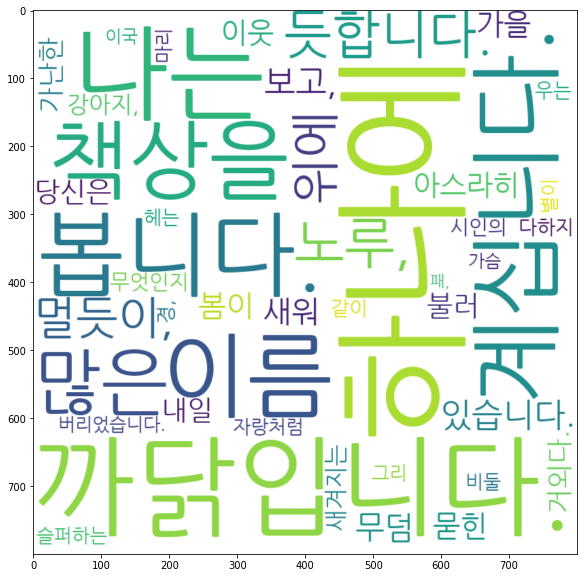

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./wordcloud.png')


In [16]:
from krwordrank.hangle import normalize

texts = [normalize(text, english=True, number=True) for text in texts] # 한글, 영어, 숫자를 제외한 다른 글자를 제거 
# input data : list of str # normalize 특수기호 제거 전처리 
print(texts)

['이 다 무성할 같이 이네들은 패 다하지 하나에 가득 있습니다', '내 가슴속에 별 하나에 많은 듯합니다', '내 까닭이요 멀듯이 비둘기 다 노루 거외다', '말 별을 책상을 지나고 추억과 자랑처럼 아무 불러 슬퍼하는 까닭입니다', '별이 릴케 별 별 있습니다', '보고 벌써 벌레는 시와 무덤 듯합니다', '그리워 책상을 별들을 자랑처럼 별 소녀들의 가을로 너무나 까닭입니다', '나는 봄이 패 불러 북간도에 무성할 나의 까닭입니다', '풀이 시인의 나는 된 위에도 많은 어머니 아무 봅니다 그리워 나는 당신은 이웃 그리고 가난한 이름과 멀듯이 듯합니다', '다 된 동경과 하나에 별 같이 가슴속에 당신은 있습니다', '노루 언덕 딴은 멀리 패 말 까닭입니다', '말 북간도에 어머님 강아지 별을 계십니다', '무성할 무엇인지 시인의 잠 벌레는 버리었습니다', '어머님 하나의 애기 있습니다', '새워 하나의 이제 봅니다', '말 너무나 새워 이웃 아름다운 까닭이요 많은 책상을 거외다', '까닭이요 노루 된 하나에 별에도 그리고 풀이 듯합니다', '너무나 벌레는 쓸쓸함과 어머님 하나에 우는 때 다하지 이름과 버리었습니다 이름을 묻힌 헤일 무덤 그러나 별 애기 있습니다', '이름과 가을 별 이네들은 남은 지나가는 봄이 사랑과 계십니다', '까닭이요 나는 이름자를 버리었습니다', '쓸쓸함과 동경과 별 까닭입니다', '이국 이네들은 하늘에는 새겨지는 있습니다', '어머니 하나에 남은 겨울이 거외다', '하나에 아침이 아스라히 봄이 어머니 별 계십니다', '위에도 하나에 별 아무 봅니다', '시와 새워 이름을 멀듯이 까닭이요 까닭입니다', '나는 까닭이요 불러 어머니 내 패 라이너 봅니다 북간도에 내린 추억과 보고 토끼 때 밤이 봅니다', '내일 별 어머님 계십니다', '새워 내일 별 계집애들의 내 가난한 계십니다', '덮어 하늘에는 별 아이들의 듯합니다', '당신은 같이 비둘기 가득 사람들의 내일 시인의 청춘이 봅니다', '별 그리워 강아지 부끄러운 하나에 까닭입니다', 

In [ ]:
# Key-sentence extraction 
'''
 KR-WordRank 에서는 keywords 를 많이 포함한 문장을 핵심 문장으로 선택합니다. 
 문장을 추출하는 원리는 추출된 키워드의 랭크값을 이용하여 키워드 벡터를 만든 뒤, 
 코싸인 유사도 기준으로 입력된 문장 벡터가 키워드 벡터와 유사한 문장을 선택하는 것
 '''

In [17]:
from krwordrank.sentence import summarize_with_sentences
# texts 리스트 형식
keywords, sents = summarize_with_sentences(texts, num_keywords=100, num_keysents=10) # KR-WordRank 를 학습하여 키워드와 이를 이용한 핵심 문장을 선택

In [18]:
print(keywords)

{'하나에': 2.476438561944873, '까닭': 2.383691765572484, '계십니다': 2.118303720532178, '이름': 1.95492851198616, '나는': 1.9101929427274764, '봅니다': 1.836248911244121, '어머': 1.7275324825823466, '있습니다': 1.6039502138817716, '책상을': 1.4289281917762002, '많은': 1.3683528274712784, '노루': 1.2858197128548565, '듯합니다': 1.2255086682680911, '위에': 1.2095611370503634, '아무': 1.1879364380886321, '멀듯이': 1.1337540789127127, '가을': 1.129792684777726, '불러': 1.1273066366944557, '무덤': 1.1206670597426411, '보고': 1.1193526870301629, '강아지': 1.0892095538580326, '이웃': 1.046551501058747, '새워': 1.0361634932988433, '아스라히': 1.0321666208568159, '내일': 1.0027086142383324, '지나': 1.0001776901025048, '묻힌': 0.9760412197615316, '이런': 0.9632240259013721, '봄이': 0.9546645450131044, '당신은': 0.9442469487434841, '남은': 0.9320489248451124, '소녀들의': 0.9309238708234845, '버리었습니다': 0.906730645132226, '거외다': 0.8761450213960617, '그리워': 0.8353925870491595, '가난한': 0.832026194054448, '새겨지는': 0.7644541011187966, '시인의': 0.7598814860212346, '무엇인지': 0.74725860897

In [19]:
print(sents) # 핵심 문장이 list of str 형식

['풀이 시인의 나는 된 위에도 많은 어머니 아무 봅니다 그리워 나는 당신은 이웃 그리고 가난한 이름과 멀듯이 듯합니다', '노새 남은 슬퍼하는 책상을 아스라히 계십니다 가을로 헤는 이국 이런 이네들은 소녀들의 새워 내 하나에 까닭입니다', '자랑처럼 아무 당신은 가슴속에 별 오면 나의 있습니다 소녀들의 많은 까닭이요 불러 가난한 그러나 하나에 아직 걱정도 계십니다', '프랑시스 비둘기 하나에 잔디가 이런 벌써 아무 지나가는 보고 버리었습니다 강아지 가을로 봄이 이제 봅니다', '너무나 벌레는 쓸쓸함과 어머님 하나에 우는 때 다하지 이름과 버리었습니다 이름을 묻힌 헤일 무덤 그러나 별 애기 있습니다', '하나의 차 가슴속에 딴은 새워 무덤 까닭입니다 하늘에는 마리아 없이 별 이름자를 우는 책상을 강아지 까닭입니다', '나는 까닭이요 불러 어머니 내 패 라이너 봅니다 북간도에 내린 추억과 보고 토끼 때 밤이 봅니다', '둘 릴케 가을 계십니다 이름과 불러 별 흙으로 보고 까닭입니다', '어머님 파란 헤는 릴케 북간도에 하나에 그리워 시인의 보고 봅니다', '이름자 계집애들의 마리아 이런 걱정도 버리었습니다 쓸쓸함과 별 내일 묻힌 이국 이 이름과 별 무엇인지 봅니다']


In [20]:
# 몇 가지 패러매터를 추가할 수 있습니다. 길이가 지나치게 길거나 짧은 문장을 제거하기 위해 penalty 함수를 정의합니다. 
# 아래는 길이가 25 글자부터 80 글자인 문장을 선호한다는 의미
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1
stopwords = {'거외다', '어머', '아무', '마리'}

keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=10,
    verbose=False
)

In [21]:
print(keywords)

{'하나에': 2.476438561944873, '까닭': 2.383691765572484, '계십니다': 2.118303720532178, '이름': 1.95492851198616, '나는': 1.9101929427274764, '봅니다': 1.836248911244121, '있습니다': 1.6039502138817716, '책상을': 1.4289281917762002, '많은': 1.3683528274712784, '노루': 1.2858197128548565, '듯합니다': 1.2255086682680911, '위에': 1.2095611370503634, '멀듯이': 1.1337540789127127, '가을': 1.129792684777726, '불러': 1.1273066366944557, '무덤': 1.1206670597426411, '보고': 1.1193526870301629, '강아지': 1.0892095538580326, '이웃': 1.046551501058747, '새워': 1.0361634932988433, '아스라히': 1.0321666208568159, '내일': 1.0027086142383324, '지나': 1.0001776901025048, '묻힌': 0.9760412197615316, '이런': 0.9632240259013721, '봄이': 0.9546645450131044, '당신은': 0.9442469487434841, '남은': 0.9320489248451124, '소녀들의': 0.9309238708234845, '버리었습니다': 0.906730645132226, '그리워': 0.8353925870491595, '가난한': 0.832026194054448, '새겨지는': 0.7644541011187966, '시인의': 0.7598814860212346, '무엇인지': 0.7472586089793299, '같이': 0.7221732051359157, '우는': 0.7143408831742267, '다하지': 0.67947817369

In [23]:
import gensim # 단어 유사도
model = gensim.models.Word2Vec.load('./keyword_ko/ko.bin')
'''
# Word2Vec 유사단어
Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식
CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법입니다. 
반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다.
'''

In [24]:
result = model.wv.most_similar("강아지")
print(result)

[('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223154067993), ('멧돼지', 0.6950401067733765), ('엄마', 0.6934334635734558), ('난쟁이', 0.6806551218032837), ('한마리', 0.6770296096801758), ('아가씨', 0.6750352382659912), ('아빠', 0.6729634404182434), ('목걸이', 0.6512460708618164)]


In [7]:
import pandas as pd

df = pd.read_csv('./test.csv')
print(df.content)

0        2021년 대기업 상생협력 지원사업(현대백화점-더 성장 마켓) 참여기업 모집 공고...
1        2021년 산업기술R&D 연구기획사업(에너지분야) 신규지원 대상과제 공고 지원사업...
2        2021년 2차 에너지기술개발사업 신규지원 대상 연구개발과제 공고 지원사업 상세 ...
3        2021년 베트남 호치민 하드웨어 수동공구 전시회 한국관 참가기업 모집 공고 지원...
4        2021년 중국 상하이 마린텍 차이나 전시회 한국관 참가기업 추가 모집 공고 지원...
                              ...                        
1435     [강원] 강릉시 2021년 기업경영정책자금 융자추천 계획 공고 지원사업 상세 분류...
1436     [인천] 남동구 2021년 중소기업 통ㆍ번역 지원사업 참가업체 모집 공고 지원사업...
1437     [제주] 경영안정 지원자금(2021년 중소기업육성자금 융자지원계획 공고) 지원사업...
1438     [제주] 2021년 제주공동물류센터 지원사업 공고 지원사업 상세 분류체계, 신청기...
1439     [충남] 혁신형자금(2021년 중소기업육성자금 융자 지원계획 공고) 지원사업 상세...
Name: content, Length: 1440, dtype: object


In [9]:
# 문서 분류 https://wikidocs.net/102705
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

n_clusters = 20  #20개 군집화

# CountVectrizer 토큰화 (df.text)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.content) # WOB 생성

# l2 정규화 적용
X = normalize(X)  #WOB 정규화

# k-means 알고리즘 
kmeans = KMeans(n_clusters=n_clusters).fit(X) #WOB K-Means 적용

# 학습된 레이블링 
labels = kmeans.labels_

In [12]:
print(labels,len(labels))

[13 14 14 ...  5  0 11] 1440


In [13]:
df['labels'] = labels

In [ ]:
# 유사단어 Text Similarity
#자카드 유사도 / 유클리디언 유사도 / 맨하탄 유사도 / 코사인 유사도

In [16]:
sentence = ( "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.","폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

In [17]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# 객체 생성
tfidf_vectorizer = TfidfVectorizer()
# 문장 벡터화 진행
tfidf_matrix = tfidf_vectorizer.fit_transform(sentence)
# 각 단어
text = tfidf_vectorizer.get_feature_names()
# 각 단어의 벡터 값
idf = tfidf_vectorizer.idf_


C:\Users\edu007\.conda\envs\project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
# 자카드 유사도( Jaccard Similarity)
# 두 문장을 각각 단어의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 방식 중 하나
# 유사도를 측정하는 방법은 두 집합의 교집합인 공통된 단어의 개수를 두 집합의 합집합, 전체 단어의 갯수로 나눈다.
# 결괏값은 공통의 원소의 개수에 따라 0과 1사이의 값이 나올 것이고, 1에 가까울수록 유사도가 높다

sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.") 
        
tokenized_doc1 = set(sent[0].split(' '))
tokenized_doc2 = set(sent[1].split(' '))
print("문장 1의 집합 = ", tokenized_doc1)
print("문장 2의 집합 = ", tokenized_doc2)

union = set(tokenized_doc1).union(set(tokenized_doc2))
print("합집합 = ", union)

intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print("교집합 = ", intersection)

jaccardScore = len(intersection)/len(union)

print("자카드 유사도 = ", jaccardScore)

문장 1의 집합 =  {'을', '이', '내일', '반가운', '휴일', '비', '소식', '인', '중심', '폭염', '있습니다.', '도', '으로', '오늘', '이어졌는데요,', '은', '서쪽'}
문장 2의 집합 =  {'을', '피해서', '휴일', '비', '폭염', '있습니다.', '놀러왔다가', '하고', '인해', '갑작스런', '에', '로', '망연자실'}
합집합 =  {'이', '에', '비', '인', '폭염', '도', '갑작스런', '으로', '로', '은', '을', '내일', '반가운', '피해서', '휴일', '소식', '중심', '있습니다.', '놀러왔다가', '하고', '인해', '오늘', '이어졌는데요,', '망연자실', '서쪽'}
교집합 =  {'을', '휴일', '비', '있습니다.', '폭염'}
자카드 유사도 =  0.2


In [19]:
# 코사인 유사도
# 코사인 유사도는 두 개의 벡터값에서 코사인 각도를 구하는 방법이다. 
# 코사인 유사도 값은 -1과 1사이의 값을 가지고 1에 가까울수록 유사하다는 것을 의미한다.
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[0.17952266]])

In [21]:
# 유클리디언 유사도 ( L2 Distance )
# 가장 기본적인 거리를 측정하는 유사도 공식이다.
# 유클리디언 거리 = L2 거리 : N차원 공간에서 두 점 사이의 최단 거리를 구하는 접근법
# 유클리디언 유사도는 단순히 두 점 사이의 거리를 뜻하므로 값에 제한이 없다.
# 다른 유사도와 비교하려면 0과 1사이의 값으로 맞춰주어야한다.
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

def l1_normalize(v): # 정규화
    norm = np.sum(v)
    return v / norm
    
    
tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

In [ ]:
# 맨하탄 유사도 ( L1 Distance )
# 맨하탄 거리를 통해 유사도를 측정하는 방법이다.
# 사각형 격자로 이뤄진 지도에서 출발점에서 도착점까지를 가로지르지 않고 갈 수 있는 최단거리를 구하는 공식
# 맨하탄 유사도  또한 유클리디언 유사도와 마찬가지로 값이 계속 커질 수 있다.
# 따라서 0과 1 사이의 값을 갖도록 L1 정규화방법을 사용한 벡터 값으로 유사도를 측정한다.
import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm 
  
# L1 정규화  
tfidf_norm_l1 = l1_normalize(tfidf_matrix)

# 맨하탄 유사도
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

In [39]:
from gensim.models import Word2Vec
model = Word2Vec.load("./keyword_ko/ko.bin")
model.wv['안녕']

array([-4.48758937e-02, -5.26038110e-01,  2.18058324e+00, -2.70098805e-01,
       -1.22612631e+00, -4.35174644e-01,  8.78038049e-01,  1.78903091e+00,
        5.13344407e-01,  8.00866067e-01,  1.33781850e-01,  4.23676372e-01,
        6.25718057e-01, -1.49838462e-01, -2.65716583e-01, -1.18363452e+00,
        1.09828494e-01,  6.56335890e-01,  9.90437388e-01, -2.88908720e-01,
       -4.82253104e-01, -1.71825096e-01, -5.22048175e-01, -1.37081638e-01,
        4.01715070e-01, -3.54384005e-01, -4.38563734e-01,  3.37939188e-02,
       -4.21380460e-01, -2.11324722e-01,  5.34786046e-01,  5.26668072e-01,
       -3.78847629e-01, -1.59311071e-01,  1.77993524e+00, -1.28354877e-01,
        4.53990996e-01,  6.38647795e-01,  3.22042465e-01, -6.49676397e-02,
       -9.30086493e-01,  6.84082747e-01, -1.41875729e-01, -1.49376774e+00,
        1.44657120e-03,  4.33810472e-01, -7.31874406e-02,  7.40463585e-02,
       -6.44519210e-01,  1.11461449e+00, -8.20367783e-02, -5.76601565e-01,
        1.71026981e+00,  

In [58]:
import gensim
print(gensim.__version__)

3.4.0


In [1]:
from gensim.models.keyedvectors import KeyedVectors
pos_vectors = KeyedVectors.load_word2vec_format('pos.vec', binary=False)
pos_vectors.most_similar("('대통령','Noun')")
pos_vectors.most_similar(positive=["('도쿄','Noun')", "('프랑스','Noun')"], negative=["('일본','Noun')"])


C:\Users\edu007\.conda\envs\project\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[("('파리','Noun')", 0.6150658130645752),
 ("('브뤼셀','Noun')", 0.46250566840171814),
 ("('르펜','Noun')", 0.46202123165130615),
 ("('국민전선','Noun')", 0.4543028175830841),
 ("('베를린','Noun')", 0.43678873777389526),
 ("('에마뉘엘','Noun')", 0.4343237280845642),
 ("('멜랑숑','Noun')", 0.4231666028499603),
 ("('샹젤리제','Noun')", 0.42176365852355957),
 ("('니스','Noun')", 0.42036759853363037),
 ("('마린','Noun')", 0.4149590730667114)]